## <font size=3>k近邻算法</font>
k-Nearest-Neighbor

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
'''
原始数据
每一个样本的特征

'''
raw_data_X = [
    [3.393535321, 2.331278738],
    [3.110075348, 1.781536454],
    [1.343805883, 3.368365095],
    [3.582295404, 4.679179871],
    [2.280362544, 2.866995326],
    [7.423436594, 4.696522888],
    [5.745051997, 3.533989803],
    [9.172168622, 2.585156155],
    [7.792684984, 3.424845545],
    [7.956156488, 0.785156155],
]

'''
每一个样本的类别
'''
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [39]:
'''
训练特征点X

训练用标签y

'''
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [40]:
X_train

array([[3.39353532, 2.33127874],
       [3.11007535, 1.78153645],
       [1.34380588, 3.3683651 ],
       [3.5822954 , 4.67917987],
       [2.28036254, 2.86699533],
       [7.42343659, 4.69652289],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.58515615],
       [7.79268498, 3.42484555],
       [7.95615649, 0.78515616]])

In [41]:
'''
向量
'''
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

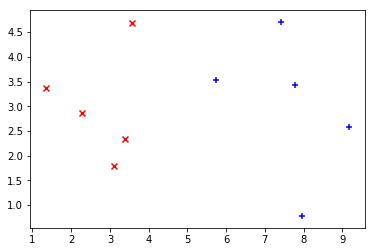

In [42]:
'''
结合了fancy indexing

'''
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red', marker='x')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue', marker='+')
plt.show()

In [43]:
x = np.array([8.093607318, 3.0365731514])

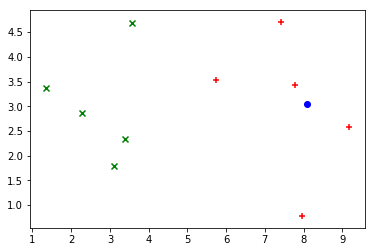

In [45]:
'''
这个绿色点分在那个类别就很明显了
'''
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g', marker='x')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r', marker='+')
plt.scatter(x[0], x[1], color='b')
plt.show()

## <font size=3>kNN的过程</font>

In [46]:
'''
首先要计算新的x的点, 和原来每一个点的距离是多少

d 如何求? 想一想nparray中的universal方法
    (x_train - x)**2: 两个向量中的每一个值对应相减 的平方, 这是对这个结果向量的每一个元素都求了平方
    np.sum((x_train - x)**2): 然后在把 每一个元素的差的平方 累加
    from math import sqrt: 导入开方函数
    
'''
from math import sqrt
distances = []  # 距离的空列表
for x_train in X_train:  # 在大X的计算每一个小的x的距离
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)  # 再把每一个x_train到x的欧氏距离载入distances列表中

In [48]:
'''
最终, distances中就存放了x与X_train中每一个x_train元素相对应的欧氏距离
'''
distances

[4.7526957599405435,
 5.139134947423814,
 6.757951265418088,
 4.801051137060864,
 5.815717620492393,
 1.790129025334513,
 2.400653123857416,
 1.169218453123699,
 0.4912328396309444,
 2.2556088362893254]

In [49]:
'''
然而实际上上面的过程在Python中使用一句话就能够搞定
'''
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
distances

[4.7526957599405435,
 5.139134947423814,
 6.757951265418088,
 4.801051137060864,
 5.815717620492393,
 1.790129025334513,
 2.400653123857416,
 1.169218453123699,
 0.4912328396309444,
 2.2556088362893254]

In [50]:
'''
距离求出来了, 我们关心的是最近的是哪些点

前几节我们学到了 np.argsort(distances)对其进行排序, 但是返回的是相应的索引

我们就拿到了从近到远是哪些点

'''

np.argsort(distances)

array([8, 7, 5, 9, 6, 0, 3, 1, 4, 2], dtype=int64)

In [54]:
nearest = np.argsort(distances)

In [55]:
k=6

In [56]:
'''
k = 6
这六个点所属的y坐标: topK_y = []  # 前k个元素

最近的6个点对应的y其中前5个都是1, 最后一个是0

'''
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [57]:
'''
我们拿到topK_y, 要数里面不同的类别的点有多少个

collections.Counter(<传入数组>): 对传入数组里面的元素出现的频次做统计
'''
from collections import Counter

Counter(topK_y)

Counter({0: 1, 1: 5})

In [58]:
'''
统计票数
'''
votes = Counter(topK_y)

In [63]:
'''
votes.most_common(n): 找出票数最多的n个元素

votes.most_common(2): 找出票数最多的2个元素

不过我们只对票数最多的那一个感兴趣

返回一个数组, 数组里面是元组, 元组[0]:这个是什么元素, 元组[1]:元素的频次

'''
votes.most_common(1)

[(1, 5)]

In [62]:
votes.most_common(1)[0]

(1, 5)

In [64]:
'''
这其实就是kNN算法的预测结果, 说明新来的x最有可能是属于1分类的

在对应数据的语义中, x是恶性肿瘤的可能性会更大一点
'''
votes.most_common(1)[0][0]

1

In [65]:
'''
如果我们要将结果存储起来, 就会存在predict_y中

predict_y的值为1

这就是kNN的整个过程
'''
predict_y = votes.most_common(1)[0][0]
predict_y

1